<a href="https://colab.research.google.com/github/taechanha/inverseDesignMetaMatl/blob/main/%5Br%5D_w_o_transpose%3B_0_1_(351)_%26_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################

import numpy as np
import matplotlib.pyplot as plt

f = open("/content/dataset_2.txt", 'r')
data = []
length = 0
for i in f:
  new = []
  new.append(i)
  data.append(new)
  # length of dataset
  length += 1

f.close()

# create dataset from data
dataset = []
for i in range(length):
  new = []
  for j in data[i][0].split(','):
    new.append(float(j))
  dataset.append(new)

edge_index = dataset

# trim out label from dataset
# Ex Ey Ez
label = []
new = []
for line in dataset:
  tmp = []
  tmp.append(line.pop(-1))
  tmp.append(line.pop(-1))
  tmp.append(line.pop(-1))
  tmp.reverse()
  label.append(tmp)

print("shape of label: ", np.array(label).shape)
print("shape of dataset: ", np.array(dataset).shape)

# whole dataset to Tensor & train/test split
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

edge_index = torch.FloatTensor(edge_index)
label = torch.FloatTensor(label)

split = int(length * 0.8)

x_train = edge_index[:split]
y_train = label[:split]
x_val = edge_index[split:]
y_val = label[split:]

print("x_train, y_train, x_val shape: ", x_train.shape, y_train.shape, x_val.shape)

# create torch dataset
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, label, dataset, transform=None, target_transform=None):
        self.labels = label
        self.dataset = dataset
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        data = self.dataset[idx]
        label = self.labels[idx]
        if self.transform:
            data = self.transform(data)
        if self.target_transform:
            label = self.target_transform(label)
        return data, label

# create DataLoader
from torch.utils.data import DataLoader

training_data   = CustomDataset(label=y_train, dataset=x_train)
test_data       = CustomDataset(label=y_val, dataset=x_val)
train_loader    = DataLoader(training_data, batch_size=4, shuffle=True)
test_loader     = DataLoader(test_data, batch_size=4, shuffle=False)

shape of label:  (2000, 3)
shape of dataset:  (2000, 351)
x_train, y_train, x_val shape:  torch.Size([1600, 351]) torch.Size([1600, 3]) torch.Size([400, 351])


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()

        self.fc1 = nn.Linear(351, 3)

        nn.init.xavier_uniform_(self.fc1.weight)
        #nn.init.xavier_uniform_(self.fc2.weight)
        #nn.init.xavier_uniform_(self.fc3.weight)
        #nn.init.xavier_uniform_(self.fc4.weight)
        #nn.init.xavier_uniform_(self.fc5.weight)
        #nn.init.xavier_uniform_(self.fc6.weight)
        #nn.init.xavier_uniform_(self.fc7.weight)

    def forward(self, x):
        x = self.fc1(x.view(-1, 351))
        # x = F.leaky_relu(x)
        # x = self.fc2(x)
        # x = F.leaky_relu(x)
        # x = self.fc3(x)
        # x = F.leaky_relu(x)
        # x = self.fc4(x)
        # x = F.leaky_relu(x)
        # x = self.fc5(x)
        # x = F.leaky_relu(x)
        # x = self.fc6(x)
        # x = F.leaky_relu(x)
        
        return x


model = DNN().cuda()
print(model)

DNN(
  (fc1): Linear(in_features=351, out_features=3, bias=True)
)


In [17]:
# the number of trainable parameter
sum(p.numel() for p in model.parameters() if p.requires_grad)

1056

In [18]:
def train(model, train_losses, epoch):
    model.train()
    train_loss = 0
    for x, y in train_loader:
        x, y = x.cuda().float(), y.cuda()
        optimizer.zero_grad()
        o = model(x)
        loss = loss_function(o, y)
        
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    print('====> Epoch: {} loss: {:.4f}'.format(e, train_loss / len(train_loader)))
    train_losses.append(train_loss / len(train_loader))

def test(model, val_losses):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.cuda().float(), y.cuda()       
            o = model(x)
            loss = loss_function(o, y)
            
            test_loss += loss.item()
    print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))
    val_losses.append(test_loss / len(test_loader))


def test_pred(model):
    y_pred = []
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.cuda().float(), y.cuda()       
            o = model(x)
            y_pred.append(o)

            loss = loss_function(o, y)
            test_loss += loss.item()
    print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))

    return y_pred

In [19]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_function = nn.MSELoss()
epochs = 100

# for loss plot
#tloss = []
#vloss = []

for e in range(1, epochs+1):
    train(model, tloss, e)
    test(model, vloss)

y_pred = test_pred(model)

====> Epoch: 1 loss: 120.0820
====> Test set loss: 116.9020
====> Epoch: 2 loss: 114.4518
====> Test set loss: 111.3775
====> Epoch: 3 loss: 109.0636
====> Test set loss: 106.1399
====> Epoch: 4 loss: 103.9247
====> Test set loss: 101.1443
====> Epoch: 5 loss: 99.0228
====> Test set loss: 96.3472
====> Epoch: 6 loss: 94.3357
====> Test set loss: 91.7584
====> Epoch: 7 loss: 89.8448
====> Test set loss: 87.3714
====> Epoch: 8 loss: 85.5614
====> Test set loss: 83.2101
====> Epoch: 9 loss: 81.4670
====> Test set loss: 79.1972
====> Epoch: 10 loss: 77.5587
====> Test set loss: 75.3832
====> Epoch: 11 loss: 73.8385
====> Test set loss: 71.7393
====> Epoch: 12 loss: 70.3030
====> Test set loss: 68.3028
====> Epoch: 13 loss: 66.9344
====> Test set loss: 65.0120
====> Epoch: 14 loss: 63.7306
====> Test set loss: 61.8882
====> Epoch: 15 loss: 60.6972
====> Test set loss: 58.9301
====> Epoch: 16 loss: 57.8307
====> Test set loss: 56.1484
====> Epoch: 17 loss: 55.1161
====> Test set loss: 53.493

In [20]:
y1 = y_pred

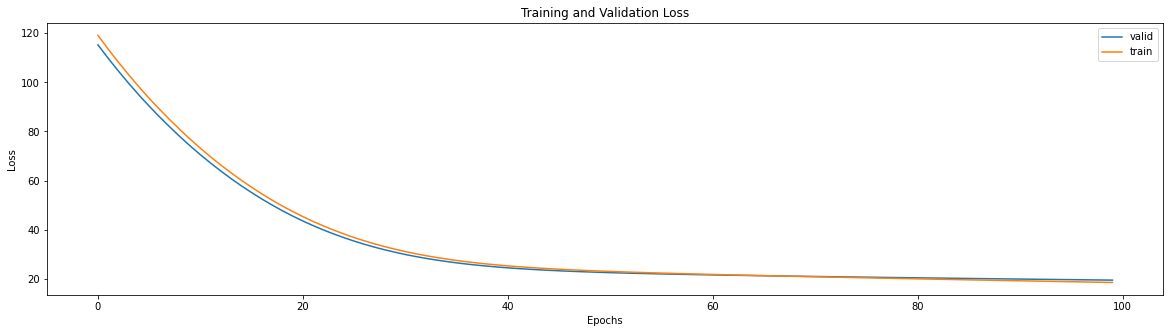

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss[:100]), label="valid")
plt.plot(np.array(tloss[:100]), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [22]:
# RMSE

model.eval()
test_loss = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda().float(), y.cuda()       
        o = model(x)
        loss = torch.sqrt(loss_function(o, y))
        
        test_loss += loss.item()
print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))

====> Test set loss: 4.2981


In [23]:
###

In [343]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()

        self.fc1 = nn.Linear(351, 3)
        self.fc2 = nn.Linear(3, 3)

        #nn.init.xavier_normal_(self.fc1.weight)
        #nn.init.xavier_normal_(self.fc2.weight)
        #nn.init.xavier_uniform_(self.fc1.weight)
        #nn.init.xavier_uniform_(self.fc2.weight)
        #nn.init.xavier_uniform_(self.fc3.weight)
        #nn.init.xavier_uniform_(self.fc4.weight)
        #nn.init.xavier_uniform_(self.fc5.weight)
        #nn.init.xavier_uniform_(self.fc6.weight)
        #nn.init.xavier_uniform_(self.fc7.weight)

    def forward(self, x):
        x = self.fc1(x.view(-1, 351))
        x = F.relu(x)
        x = self.fc2(x)
        # x = F.leaky_relu(x)
        # x = self.fc3(x)
        # x = F.leaky_relu(x)
        # x = self.fc4(x)
        # x = F.leaky_relu(x)
        # x = self.fc5(x)
        # x = F.leaky_relu(x)
        # x = self.fc6(x)
        # x = F.leaky_relu(x)
        
        return x


def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data, nn.init.calculate_gain('relu'))
        #nn.init.xavier_uniform_(m.weight.data)
        #nn.init.xavier_uniform_(m.bias.data)

torch.manual_seed(42)
model = DNN().cuda()
model.apply(weights_init)
print(model)

DNN(
  (fc1): Linear(in_features=351, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
)


In [338]:
# the number of trainable parameter
sum(p.numel() for p in model.parameters() if p.requires_grad)

1423

In [352]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=1e-5)
loss_function = nn.MSELoss()
epochs = 100

# for loss plot
tloss = []
vloss = []

for e in range(1, epochs+1):
    train(model, tloss, e)
    test(model, vloss)

y_pred = test_pred(model)

====> Epoch: 1 loss: 4.9144
====> Test set loss: 8.3280
====> Epoch: 2 loss: 4.9140
====> Test set loss: 8.3275
====> Epoch: 3 loss: 4.9139
====> Test set loss: 8.3273
====> Epoch: 4 loss: 4.9137
====> Test set loss: 8.3270
====> Epoch: 5 loss: 4.9136
====> Test set loss: 8.3269
====> Epoch: 6 loss: 4.9135
====> Test set loss: 8.3266
====> Epoch: 7 loss: 4.9134
====> Test set loss: 8.3264
====> Epoch: 8 loss: 4.9132
====> Test set loss: 8.3263
====> Epoch: 9 loss: 4.9131
====> Test set loss: 8.3262
====> Epoch: 10 loss: 4.9131
====> Test set loss: 8.3260
====> Epoch: 11 loss: 4.9130
====> Test set loss: 8.3262
====> Epoch: 12 loss: 4.9129
====> Test set loss: 8.3261
====> Epoch: 13 loss: 4.9128
====> Test set loss: 8.3260
====> Epoch: 14 loss: 4.9127
====> Test set loss: 8.3261
====> Epoch: 15 loss: 4.9126
====> Test set loss: 8.3259
====> Epoch: 16 loss: 4.9126
====> Test set loss: 8.3258
====> Epoch: 17 loss: 4.9127
====> Test set loss: 8.3259
====> Epoch: 18 loss: 4.9125
====> Test 

In [345]:
y3 = y_pred

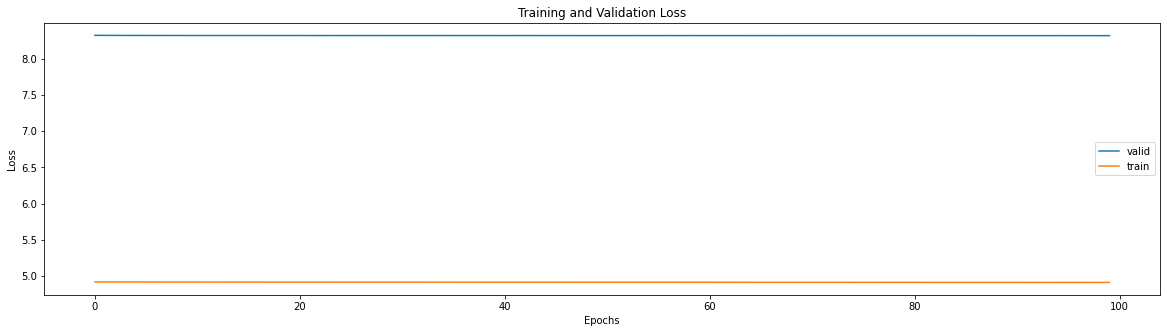

In [355]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss[:100]), label="valid")
plt.plot(np.array(tloss[:100]), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [354]:
# RMSE

model.eval()
test_loss = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda().float(), y.cuda()       
        o = model(x)        
        loss = torch.sqrt(loss_function(o, y))
        
        test_loss += loss.item()
print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))

====> Test set loss: 2.8074


In [271]:
x, y = next(iter(test_loader))
o = model(x.cuda())
F.l1_loss(o, y.cuda())

tensor(2.8333, device='cuda:0', grad_fn=<L1LossBackward>)

In [193]:
y, "", o

(tensor([[20.4802, 13.7561,  9.1044],
         [12.0543,  0.6352,  7.2949],
         [12.8651, 11.9096,  8.6483],
         [14.9428,  6.6858,  3.0543]]),
 '',
 tensor([[16.9475, 11.4188, 10.7900],
         [11.4712,  5.3696, 10.1922],
         [ 6.8841, 13.0890,  8.4076],
         [18.3584,  9.6885,  4.1041]], device='cuda:0', grad_fn=<AddmmBackward>))

In [30]:
###

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()

        self.fc1 = nn.Linear(351, 175)
        self.fc2 = nn.Linear(175, 87)
        self.fc3 = nn.Linear(87, 3)

        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        #nn.init.xavier_uniform_(self.fc4.weight)
        #nn.init.xavier_uniform_(self.fc5.weight)
        #nn.init.xavier_uniform_(self.fc6.weight)
        #nn.init.xavier_uniform_(self.fc7.weight)

    def forward(self, x):
        x = self.fc1(x.view(-1, 351))
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        # x = F.leaky_relu(x)
        # x = self.fc4(x)
        # x = F.leaky_relu(x)
        # x = self.fc5(x)
        # x = F.leaky_relu(x)
        # x = self.fc6(x)
        # x = F.leaky_relu(x)
        
        return x


model = DNN().cuda()
print(model)

DNN(
  (fc1): Linear(in_features=351, out_features=175, bias=True)
  (fc2): Linear(in_features=175, out_features=87, bias=True)
  (fc3): Linear(in_features=87, out_features=3, bias=True)
)


In [32]:
# the number of trainable parameter
sum(p.numel() for p in model.parameters() if p.requires_grad)

77176

In [33]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_function = nn.MSELoss()
epochs = 100

# for loss plot
tloss = []
vloss = []

for e in range(1, epochs+1):
    train(model, tloss, e)
    test(model, vloss)

y_pred = test_pred(model)

====> Epoch: 1 loss: 80.6546
====> Test set loss: 30.7532
====> Epoch: 2 loss: 26.2126
====> Test set loss: 23.7740
====> Epoch: 3 loss: 23.6427
====> Test set loss: 22.8086
====> Epoch: 4 loss: 21.8846
====> Test set loss: 22.0581
====> Epoch: 5 loss: 20.3351
====> Test set loss: 21.0957
====> Epoch: 6 loss: 18.7405
====> Test set loss: 20.2409
====> Epoch: 7 loss: 17.0963
====> Test set loss: 19.5253
====> Epoch: 8 loss: 15.4518
====> Test set loss: 18.4297
====> Epoch: 9 loss: 13.6420
====> Test set loss: 17.2664
====> Epoch: 10 loss: 11.9302
====> Test set loss: 16.2440
====> Epoch: 11 loss: 10.3193
====> Test set loss: 15.1351
====> Epoch: 12 loss: 8.9123
====> Test set loss: 14.2347
====> Epoch: 13 loss: 7.7306
====> Test set loss: 13.3713
====> Epoch: 14 loss: 6.7612
====> Test set loss: 12.6482
====> Epoch: 15 loss: 6.0115
====> Test set loss: 11.9890
====> Epoch: 16 loss: 5.3787
====> Test set loss: 11.4828
====> Epoch: 17 loss: 4.8729
====> Test set loss: 10.9559
====> Epoch:

In [34]:
y4 = y_pred

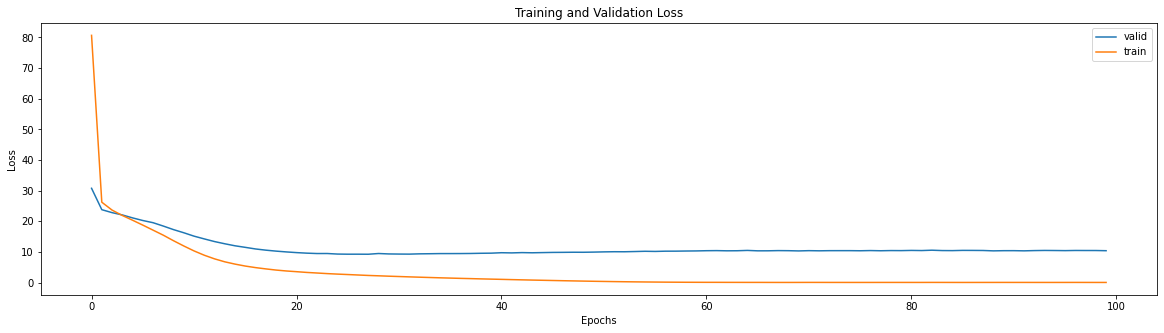

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss[:100]), label="valid")
plt.plot(np.array(tloss[:100]), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [36]:
# RMSE

model.eval()
test_loss = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda().float(), y.cuda()       
        o = model(x)
        loss = torch.sqrt(loss_function(o, y))
        
        test_loss += loss.item()
print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))

====> Test set loss: 3.1094


In [37]:
###

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()

        self.fc1 = nn.Linear(351, 175)
        self.fc2 = nn.Linear(175, 87)
        self.fc3 = nn.Linear(87, 43)
        self.fc4 = nn.Linear(43, 3)

        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)
        #nn.init.xavier_uniform_(self.fc5.weight)
        #nn.init.xavier_uniform_(self.fc6.weight)
        #nn.init.xavier_uniform_(self.fc7.weight)

    def forward(self, x):
        x = self.fc1(x.view(-1, 351))
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        # x = F.leaky_relu(x)
        # x = self.fc5(x)
        # x = F.leaky_relu(x)
        # x = self.fc6(x)
        # x = F.leaky_relu(x)
        
        return x


model = DNN().cuda()
print(model)

DNN(
  (fc1): Linear(in_features=351, out_features=175, bias=True)
  (fc2): Linear(in_features=175, out_features=87, bias=True)
  (fc3): Linear(in_features=87, out_features=43, bias=True)
  (fc4): Linear(in_features=43, out_features=3, bias=True)
)


In [41]:
# the number of trainable parameter
sum(p.numel() for p in model.parameters() if p.requires_grad)

80828

In [42]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_function = nn.MSELoss()
epochs = 100

# for loss plot
tloss = []
vloss = []

for e in range(1, epochs+1):
    train(model, tloss, e)
    test(model, vloss)

y_pred = test_pred(model)

====> Epoch: 1 loss: 87.6950
====> Test set loss: 27.4587
====> Epoch: 2 loss: 26.0991
====> Test set loss: 23.8848
====> Epoch: 3 loss: 23.6154
====> Test set loss: 22.8279
====> Epoch: 4 loss: 21.7600
====> Test set loss: 21.8867
====> Epoch: 5 loss: 20.1583
====> Test set loss: 20.9327
====> Epoch: 6 loss: 18.4468
====> Test set loss: 20.0550
====> Epoch: 7 loss: 16.6248
====> Test set loss: 18.9767
====> Epoch: 8 loss: 14.6255
====> Test set loss: 17.6533
====> Epoch: 9 loss: 12.4596
====> Test set loss: 16.3207
====> Epoch: 10 loss: 10.5399
====> Test set loss: 14.9928
====> Epoch: 11 loss: 8.8355
====> Test set loss: 13.7741
====> Epoch: 12 loss: 7.3845
====> Test set loss: 12.6329
====> Epoch: 13 loss: 6.1916
====> Test set loss: 11.7502
====> Epoch: 14 loss: 5.2125
====> Test set loss: 11.1011
====> Epoch: 15 loss: 4.5028
====> Test set loss: 10.5074
====> Epoch: 16 loss: 3.9693
====> Test set loss: 10.1350
====> Epoch: 17 loss: 3.5510
====> Test set loss: 9.8938
====> Epoch: 1

In [43]:
y5 = y_pred

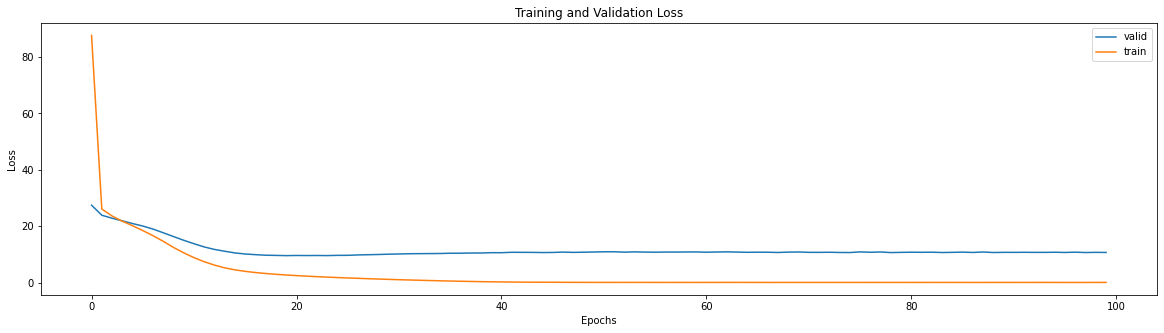

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss[:100]), label="valid")
plt.plot(np.array(tloss[:100]), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [45]:
# RMSE

model.eval()
test_loss = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda().float(), y.cuda()       
        o = model(x)
        loss = torch.sqrt(loss_function(o, y))
        
        test_loss += loss.item()
print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))

====> Test set loss: 3.1510


In [46]:
###

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()

        self.fc1 = nn.Linear(351, 175)
        self.fc2 = nn.Linear(175, 87)
        self.fc3 = nn.Linear(87, 43)
        self.fc4 = nn.Linear(43, 21)
        self.fc5 = nn.Linear(21, 3)

        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)
        nn.init.xavier_uniform_(self.fc5.weight)
        #nn.init.xavier_uniform_(self.fc6.weight)
        #nn.init.xavier_uniform_(self.fc7.weight)

    def forward(self, x):
        x = self.fc1(x.view(-1, 351))
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.leaky_relu(x)
        x = self.fc5(x)
        # x = F.leaky_relu(x)
        # x = self.fc6(x)
        # x = F.leaky_relu(x)
        
        return x


model = DNN().cuda()
print(model)

DNN(
  (fc1): Linear(in_features=351, out_features=175, bias=True)
  (fc2): Linear(in_features=175, out_features=87, bias=True)
  (fc3): Linear(in_features=87, out_features=43, bias=True)
  (fc4): Linear(in_features=43, out_features=21, bias=True)
  (fc5): Linear(in_features=21, out_features=3, bias=True)
)


In [50]:
# the number of trainable parameter
sum(p.numel() for p in model.parameters() if p.requires_grad)

81686

In [51]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_function = nn.MSELoss()
epochs = 100

# for loss plot
tloss = []
vloss = []

for e in range(1, epochs+1):
    train(model, tloss, e)
    test(model, vloss)

y_pred = test_pred(model)

====> Epoch: 1 loss: 84.2882
====> Test set loss: 26.3377
====> Epoch: 2 loss: 25.6608
====> Test set loss: 24.6806
====> Epoch: 3 loss: 22.9657
====> Test set loss: 23.1101
====> Epoch: 4 loss: 20.6248
====> Test set loss: 21.7604
====> Epoch: 5 loss: 18.3177
====> Test set loss: 20.4161
====> Epoch: 6 loss: 15.9121
====> Test set loss: 19.3140
====> Epoch: 7 loss: 13.6592
====> Test set loss: 18.2391
====> Epoch: 8 loss: 11.7075
====> Test set loss: 17.0108
====> Epoch: 9 loss: 10.1579
====> Test set loss: 16.0854
====> Epoch: 10 loss: 8.8057
====> Test set loss: 15.0959
====> Epoch: 11 loss: 7.5235
====> Test set loss: 14.0932
====> Epoch: 12 loss: 6.3174
====> Test set loss: 13.1769
====> Epoch: 13 loss: 5.2308
====> Test set loss: 12.5454
====> Epoch: 14 loss: 4.3662
====> Test set loss: 11.5081
====> Epoch: 15 loss: 3.6798
====> Test set loss: 11.2291
====> Epoch: 16 loss: 3.2202
====> Test set loss: 10.9225
====> Epoch: 17 loss: 2.8742
====> Test set loss: 10.9621
====> Epoch: 1

In [52]:
y5 = y_pred

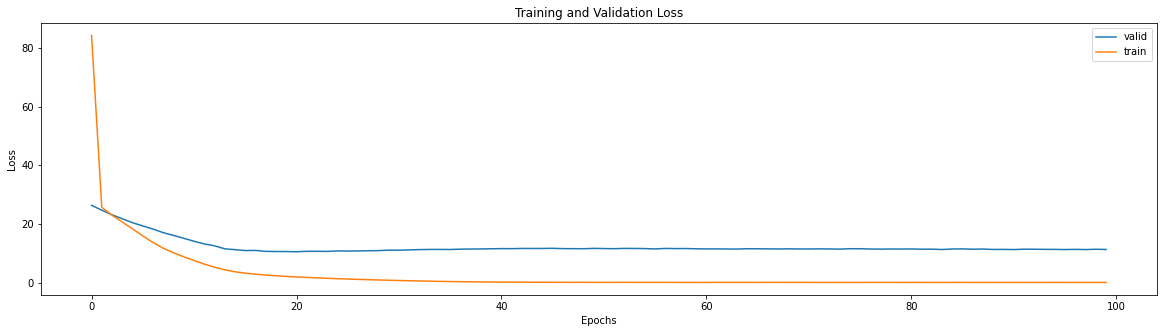

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss[:100]), label="valid")
plt.plot(np.array(tloss[:100]), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [54]:
# RMSE

model.eval()
test_loss = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda().float(), y.cuda()       
        o = model(x)
        loss = torch.sqrt(loss_function(o, y))
        
        test_loss += loss.item()
print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))

====> Test set loss: 3.2428


In [55]:
###